In [1]:
import pypsa
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd

In [3]:
n = pypsa.Network("/home/raj08555/dev/sandbox0405/pypsa-earth-sec/pypsa-earth/networks/base.nc")

INFO:pypsa.io:Imported network base.nc has buses, lines, transformers


In [4]:
n.buses.loc[n.buses["carrier"] == "DC"]

,bus_id,v_nom,symbol,under_construction,tag_substation,tag_area,lon,lat,country,substation_lv,...,y,substation_off,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,,,,,,,,,,,


In [5]:
nb = pypsa.Network("/home/raj08555/dev/sandbox0405/pypsa-earth-sec/pypsa-earth/networks/elec_s_30_ec_lc1.0_Co2L.nc")

INFO:pypsa.io:Imported network elec_s_30_ec_lc1.0_Co2L.nc has buses, carriers, generators, global_constraints, lines, loads


In [6]:
nb.buses
#nb.buses.loc[n.buses["carrier"] == "DC"]

,v_nom,country,x,y,control,generator,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
NAM10_AC,220.0,NA,17.010900,-26.663850,Slack,NAM10_AC onwind,,AC,,1.0,0.0,inf,
NAM11_AC,380.0,NA,18.534486,-28.368471,PQ,,,AC,,1.0,0.0,inf,
NAM12_AC,220.0,NA,15.452300,-26.675580,PQ,,,AC,,1.0,0.0,inf,
NAM13_AC,380.0,NA,16.690133,-27.879167,PQ,,,AC,,1.0,0.0,inf,
NAM14_AC,220.0,NA,14.846727,-22.482691,PQ,,,AC,,1.0,0.0,inf,
NAM15_AC,220.0,NA,14.887800,-21.227100,PQ,,,AC,,1.0,0.0,inf,
NAM16_AC,220.0,NA,15.474725,-22.043100,PQ,,,AC,,1.0,0.0,inf,
NAM17_AC,300.0,NA,15.740767,-21.427767,PQ,,,AC,,1.0,0.0,inf,
NAM18_AC,220.0,NA,14.549800,-22.665200,PQ,,,AC,,1.0,0.0,inf,


In [22]:
n1 = pypsa.Network("/home/raj08555/dev/sandbox0405/pypsa-earth-sec/results/test/postnetworks/elec_s_30_ec_lc1.0_Co2L_168H_2030_0.097_AP_0export.nc")
n2 = pypsa.Network("/home/raj08555/dev/sandbox0405/pypsa-earth-sec/results/test/postnetworks/elec_s_30_ec_lc1.0_Co2L_168H_2030_0.097_AP_10export.nc")
n3 = pypsa.Network("/home/raj08555/dev/sandbox0405/pypsa-earth-sec/results/test/postnetworks/elec_s_30_ec_lc1.0_Co2L_168H_2030_0.097_AP_100export.nc")

INFO:pypsa.io:Imported network elec_s_30_ec_lc1.0_Co2L_168H_2030_0.097_AP_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores
INFO:pypsa.io:Imported network elec_s_30_ec_lc1.0_Co2L_168H_2030_0.097_AP_10export.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores
INFO:pypsa.io:Imported network elec_s_30_ec_lc1.0_Co2L_168H_2030_0.097_AP_100export.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [23]:
res = [
        "csp",
        "rooftop-solar",
        "solar",
        "onwind",
        "onwind2",
        "offwind",
        "offwind2",
        "ror",
    ]
res_index = n1.generators.loc[n1.generators.carrier.isin(res)].index
n_ref = n1.generators_t.p.loc[:, res_index].resample('M').sum().sum(axis=1)


res_index = n2.generators.loc[n2.generators.carrier.isin(res)].index
n_case = n2.generators_t.p.loc[:, res_index].resample('M').sum().sum(axis=1)

diff = n_case - n_ref
diff

snapshot
2013-01-31    10508.745332
2013-02-28     7648.036002
2013-03-31     7334.209899
2013-04-30     7816.651136
2013-05-31     5398.644439
2013-06-30     5343.921552
2013-07-31     6684.312143
2013-08-31     6356.069411
2013-09-30     6759.571381
2013-10-31     9474.907996
2013-11-30     7506.498780
2013-12-31     8798.860072
Freq: M, dtype: float64

In [24]:
Elec_input_ref = n1.links_t.p0.filter(like='Electrolysis').resample('M').sum().sum(axis=1)
Elec_input_q = n2.links_t.p0.filter(like='Electrolysis').resample('M').sum().sum(axis=1)

dif_electrol = Elec_input_q - Elec_input_ref

diff - dif_electrol

snapshot
2013-01-31      4.543365
2013-02-28      0.084360
2013-03-31      0.047288
2013-04-30     37.947647
2013-05-31    138.404779
2013-06-30    235.914200
2013-07-31    294.567934
2013-08-31    145.902787
2013-09-30      0.034087
2013-10-31     19.190236
2013-11-30     16.432858
2013-12-31     92.303113
Freq: M, dtype: float64

In [13]:
# res_index = n1.generators.loc[n1.generators.carrier.isin(res)].index
# n_ref = n1.generators_t.p.loc[:, res_index].resample('M').sum().sum(axis=1)

res_index = n1.generators.loc[n1.generators.carrier.isin(res)].index
n1.generators_t.p.loc[:,res_index].resample('M').sum().sum(axis=1)

res_index = n2.generators.loc[n2.generators.carrier.isin(res)].index
n_case = n2.generators_t.p.loc[:, res_index].resample('M').sum().sum(axis=1)

diff = n_case - n_ref
diff

snapshot
2013-01-31    10508.745332
2013-02-28     7648.036002
2013-03-31     7334.209899
2013-04-30     7816.651136
2013-05-31     5398.644439
2013-06-30     5343.921552
2013-07-31     6684.312143
2013-08-31     6356.069411
2013-09-30     6759.571381
2013-10-31     9474.907996
2013-11-30     7506.498780
2013-12-31     8798.860072
Freq: M, dtype: float64

In [25]:
# Elec_input_ref = n1.links_t.p0.filter(like='Electrolysis').resample('M').sum().sum(axis=1)
# Elec_input_q = n2.links_t.p0.filter(like='Electrolysis').resample('M').sum().sum(axis=1)

# dif_electrol = Elec_input_q - Elec_input_ref

# diff - dif_electrol
n2.links_t.p0.filter(like='Electrolysis').resample('M').sum().sum(axis=1) - n1.links_t.p0.filter(like='Electrolysis').resample('M').sum().sum(axis=1) 

snapshot
2013-01-31    10504.201967
2013-02-28     7647.951642
2013-03-31     7334.162611
2013-04-30     7778.703489
2013-05-31     5260.239660
2013-06-30     5108.007351
2013-07-31     6389.744210
2013-08-31     6210.166624
2013-09-30     6759.537294
2013-10-31     9455.717761
2013-11-30     7490.065922
2013-12-31     8706.556959
Freq: M, dtype: float64

In [44]:
n3.stores_t.e.tail()

Store,co2 atmosphere,NAM10_AC co2 stored,NAM11_AC co2 stored,NAM12_AC co2 stored,NAM13_AC co2 stored,NAM14_AC co2 stored,NAM15_AC co2 stored,NAM16_AC co2 stored,NAM17_AC co2 stored,NAM18_AC co2 stored,...,NAM2_AC battery storage,NAM30_AC battery storage,NAM3_AC battery storage,NAM4_AC battery storage,NAM5_AC battery storage,NAM6_AC battery storage,NAM7_AC battery storage,NAM8_AC battery storage,NAM9_AC battery storage,H2 export store
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-12-03,-282884.681479,5.819279,3.686937,97705.430722,43147.215246,53.725042,20.690705,12.932487,13.059922,9302.773622,...,28.933884,3.543396,13.788993,40.134288,25.416188,38.976575,28.401906,12.897470,65.449620,110472.089057
2013-12-10,-288659.102404,4.100610,2.634619,66617.429405,29093.231418,36.207411,13.119731,8.937542,9.560653,6126.902712,...,29.167274,3.543022,13.783092,40.563596,25.577116,39.395619,28.623233,12.929831,65.340972,97018.778777
2013-12-17,-294433.456184,2.330240,1.515131,35529.757037,15039.058888,18.632611,6.281797,4.862883,5.455220,3016.378723,...,29.077103,3.542309,13.784863,40.322365,25.477627,39.141210,28.480245,12.918668,65.450298,116244.397847
2013-12-24,-300207.492234,0.499113,0.297548,4442.339715,984.882945,0.962273,0.432254,0.686540,0.593027,2.142469,...,33.176811,3.990804,15.696595,46.064494,29.094524,44.741979,32.538154,14.714633,74.680038,113938.592192
2013-12-31,-301015.255581,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,25.063385,3.329533,12.280284,34.733848,22.002099,33.735309,24.575978,11.208172,56.506226,0.522624


In [27]:
#n3.loads_t.p.filter(like="emission") .columns.unique()#
n3.loads_t.p.filter(like="emission").sum().sum()*168/-1e6

2.997537196977742

In [17]:
n3.links.p_nom_opt.filter(like="DAC")

Link
NAM10_AC services urban decentral DAC      0.019257
NAM11_AC services urban decentral DAC      0.007633
NAM12_AC services urban decentral DAC     33.483404
NAM13_AC services urban decentral DAC     40.139108
NAM14_AC services urban decentral DAC      0.022631
NAM15_AC services urban decentral DAC      0.009651
NAM16_AC services urban decentral DAC      0.020062
NAM17_AC services urban decentral DAC      0.013343
NAM18_AC services urban decentral DAC      0.048819
NAM19_AC services urban decentral DAC      0.042123
NAM1_AC services urban decentral DAC       0.003129
NAM20_AC services urban decentral DAC      0.013194
NAM22_AC services urban decentral DAC      0.007249
NAM23_AC services urban decentral DAC      0.005962
NAM24_AC services urban decentral DAC      0.007055
NAM25_AC services urban decentral DAC      0.008759
NAM26_AC services urban decentral DAC      0.006904
NAM27_AC services urban decentral DAC      0.007458
NAM28_AC services urban decentral DAC      0.008055
NAM29_A

In [48]:
n3.loads_t.p.filter(like="emission").sum().sum()*168/-1e6

2.997537196977742

In [49]:
n3.stores_t.e.iloc[-1]

Store
co2 atmosphere            -301015.255581
NAM10_AC co2 stored            -0.000000
NAM11_AC co2 stored            -0.000000
NAM12_AC co2 stored            -0.000000
NAM13_AC co2 stored            -0.000000
                               ...      
NAM6_AC battery storage        33.735309
NAM7_AC battery storage        24.575978
NAM8_AC battery storage        11.208172
NAM9_AC battery storage        56.506226
H2 export store                 0.522624
Name: 2013-12-31 00:00:00, Length: 379, dtype: float64

In [46]:
#n4= pypsa.Network("/home/raj08555/dev/sandbox0405/pypsa-earth-sec/results/MT_GADM_opt30_new2/postnetworks/elec_s_30_ec_lc1.0_Co2L_168H_2030_0.076_NZ_50export.nc")

In [50]:
n3.stores_t.e.iloc[-1]

Store
co2 atmosphere            -301015.255581
NAM10_AC co2 stored            -0.000000
NAM11_AC co2 stored            -0.000000
NAM12_AC co2 stored            -0.000000
NAM13_AC co2 stored            -0.000000
                               ...      
NAM6_AC battery storage        33.735309
NAM7_AC battery storage        24.575978
NAM8_AC battery storage        11.208172
NAM9_AC battery storage        56.506226
H2 export store                 0.522624
Name: 2013-12-31 00:00:00, Length: 379, dtype: float64

In [45]:
#n4.loads_t.p.filter(like="emission")

In [54]:
n = pypsa.Network("/home/raj08555/dev/sandbox0405/pypsa-earth-sec/results/test/postnetworks/elec_s_30_ec_lc1.0_Co2L_168H_2030_0.097_AP_0export.nc")

INFO:pypsa.io:Imported network elec_s_30_ec_lc1.0_Co2L_168H_2030_0.097_AP_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [55]:
n.stores_t.e.iloc[-1]

Store
co2 atmosphere            -301064.976829
NAM10_AC co2 stored            -0.000000
NAM11_AC co2 stored            -0.000000
NAM12_AC co2 stored            -0.000000
NAM13_AC co2 stored            -0.000000
                               ...      
NAM6_AC battery storage        33.639896
NAM7_AC battery storage        24.484104
NAM8_AC battery storage        11.113018
NAM9_AC battery storage        56.107675
H2 export store               115.109622
Name: 2013-12-31 00:00:00, Length: 379, dtype: float64

In [52]:

conv_gens = list(n.carriers[n.carriers.co2_emissions > 0].index)
conv_index = n.generators[n.generators.carrier.isin(conv_gens)].index
# vars_conv_gens = n.generators_t.p[conv_index]

n.generators.loc[n.generators.carrier.isin(conv_gens), "emissions"] = 0
n.generators.loc[conv_index, "emissions"] = n.generators.loc[
    conv_index, "carrier"
].apply(lambda x: n.carriers.loc[x].co2_emissions)
n.generators.emissions = n.generators.emissions.fillna(0)

weightings = pd.DataFrame(
    np.outer(n.snapshot_weightings["generators"], [1.0] * len(conv_index)),
    index=n.snapshots,
    columns=conv_index,
)

emission_factors = pd.DataFrame(
    np.outer(
        [1.0] * len(n.snapshot_weightings["generators"]),
        n.generators.loc[conv_index, "emissions"],
    ),
    index=n.snapshots,
    columns=conv_index,
)

x=emission_factors*weightings
x
(n.generators_t.p[conv_index] *x).sum().sum()

207.64204407314654

In [58]:
n.stores_t.e.filter(like="co2 stored").tail()

Store,NAM10_AC co2 stored,NAM11_AC co2 stored,NAM12_AC co2 stored,NAM13_AC co2 stored,NAM14_AC co2 stored,NAM15_AC co2 stored,NAM16_AC co2 stored,NAM17_AC co2 stored,NAM18_AC co2 stored,NAM19_AC co2 stored,...,NAM29_AC co2 stored,NAM2_AC co2 stored,NAM30_AC co2 stored,NAM3_AC co2 stored,NAM4_AC co2 stored,NAM5_AC co2 stored,NAM6_AC co2 stored,NAM7_AC co2 stored,NAM8_AC co2 stored,NAM9_AC co2 stored
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-12-03,2.159835,1.572753,3.395507,7759.265527,23.023842,54.365956,8.707528,11.906275,639.572200,15.050273,...,2.548601,3.062675,3.056657,1.712139,7.395719,3.845365,2.501220,3.217443,339.642932,3.070697
2013-12-10,1.495021,1.104108,2.289137,5172.818708,15.161381,34.456349,6.166174,9.387317,426.249583,10.949978,...,1.737208,2.115324,2.075474,1.201269,4.939355,2.517279,1.800383,2.210870,15.560868,2.082012
2013-12-17,0.804688,0.613746,1.178488,2586.407709,7.483218,15.755940,3.413000,5.893214,213.062143,5.961322,...,0.914483,1.130171,1.081930,0.667284,2.491896,1.257787,1.016472,1.168581,7.803581,1.084081
2013-12-24,0.071753,0.086821,0.061563,0.047371,0.047217,0.038464,0.052026,0.052207,0.043812,0.046740,...,0.069981,0.098059,0.067541,0.093288,0.051343,0.071815,0.105760,0.069495,0.052853,0.069914
2013-12-31,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


In [62]:
n = pypsa.Network("/home/raj08555/dev/sandbox0405/pypsa-earth-sec/results/test1/postnetworks/elec_s_30_ec_lc1.0_Co2L_168H_2030_0.097_AP_0export.nc")

INFO:pypsa.io:Imported network elec_s_30_ec_lc1.0_Co2L_168H_2030_0.097_AP_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [63]:
n.stores_t.e.filter(like="co2 stored").tail()

Store,NAM10_AC co2 stored,NAM11_AC co2 stored,NAM12_AC co2 stored,NAM13_AC co2 stored,NAM14_AC co2 stored,NAM15_AC co2 stored,NAM16_AC co2 stored,NAM17_AC co2 stored,NAM18_AC co2 stored,NAM19_AC co2 stored,...,NAM29_AC co2 stored,NAM2_AC co2 stored,NAM30_AC co2 stored,NAM3_AC co2 stored,NAM4_AC co2 stored,NAM5_AC co2 stored,NAM6_AC co2 stored,NAM7_AC co2 stored,NAM8_AC co2 stored,NAM9_AC co2 stored
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-12-03,1.518461,1.146074,2.545212,7750.974084,20.770529,35.412890,7.001728,9.134948,679.553108,18.289442,...,1.897170,2.285344,2.204582,1.198946,5.857972,3.042862,1.779214,2.328751,337.501218,2.217717
2013-12-10,1.051393,0.800384,1.712722,5167.293659,13.724474,22.204109,4.860759,7.320230,453.003917,13.002390,...,1.288053,1.580727,1.496725,0.838381,3.900775,1.976919,1.298422,1.601575,14.157329,1.502962
2013-12-17,0.563072,0.437998,0.875715,2583.640320,6.802171,9.908897,2.601938,4.719724,226.486122,6.907111,...,0.670392,0.844650,0.776953,0.460503,1.956689,0.973739,0.742968,0.845328,7.090814,0.778880
2013-12-24,0.039001,0.046465,0.032885,0.025623,0.028371,0.023246,0.031527,0.031764,0.025433,0.027222,...,0.036435,0.068302,0.037597,0.051854,0.031599,0.049174,0.066052,0.042793,0.027723,0.038758
2013-12-31,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


In [64]:
n.loads_t.p.filter(like="emission").sum().sum()*168/-1e6

2.997537196977742

In [65]:
n.stores_t.e.iloc[-1]

Store
co2 atmosphere            -301024.215526
NAM10_AC co2 stored            -0.000000
NAM11_AC co2 stored            -0.000000
NAM12_AC co2 stored            -0.000000
NAM13_AC co2 stored            -0.000000
                               ...      
NAM6_AC battery storage        33.638396
NAM7_AC battery storage        24.483221
NAM8_AC battery storage        11.113157
NAM9_AC battery storage        56.104661
H2 export store               159.780785
Name: 2013-12-31 00:00:00, Length: 379, dtype: float64

In [69]:
n= pypsa.Network("/home/raj08555/dev/sandbox0405/pypsa-earth-sec/results/test6/postnetworks/elec_s_30_ec_lc1.0_Co2L_168H_2030_0.097_AP_0export.nc")

INFO:pypsa.io:Imported network elec_s_30_ec_lc1.0_Co2L_168H_2030_0.097_AP_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [68]:
n.loads_t.p.filter(like="emission").sum().sum()*168/-1e6

2.997537196977742

INFO:pypsa.io:Imported network base.nc has buses, lines, transformers
ERROR:fiona._env:pypsa-earth/resources/shapes/gadm_shapes.geojson: No such file or directory


DriverError: pypsa-earth/resources/shapes/gadm_shapes.geojson: No such file or directory

/home/raj08555/.conda/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


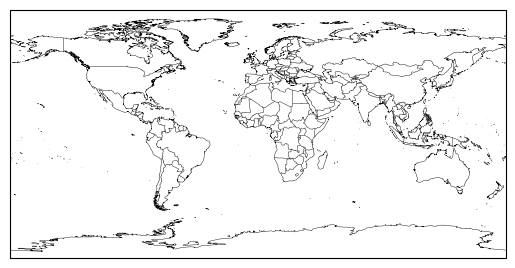

In [9]:
import pypsa
n=pypsa.Network("/home/raj08555/dev/sandbox-cs/pypsa-earth-sec/pypsa-earth/networks/base.nc")
n.plot()